<a href="https://colab.research.google.com/github/Shalinda99/fyp-HFI-module/blob/main/Hayleys_plc_Close_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
from google.colab import files



drive.mount('/content/drive')



# Load the dataset
price_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/SP_SL_20_dataset_final.csv')
price_df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
0,1/31/2025,120.75,121.5,119.00,119.50,523,1016885,122167426.0,SAMPATH BANK PLC,NaN
1,1/30/2025,119.75,120.5,118.75,120.00,587,1279402,152615285.3,SAMPATH BANK PLC,NaN
2,1/29/2025,122.00,122.0,118.50,119.25,1354,2563188,307574122.8,SAMPATH BANK PLC,NaN
3,1/28/2025,122.00,122.5,121.00,121.25,838,990361,120261351.3,SAMPATH BANK PLC,NaN
4,1/27/2025,122.00,123.0,121.50,122.00,694,895710,109462379.0,SAMPATH BANK PLC,NaN


In [ ]:
hayleys_plc_price_df = price_df[price_df['Company Name'] == "HAYLEYS PLC"]

In [ ]:
hayleys_plc_price_df['Trade Date'] = pd.to_datetime(hayleys_plc_price_df['Trade Date']).dt.date

/tmp/ipython-input-34-2756391784.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hayleys_plc_price_df['Trade Date'] = pd.to_datetime(hayleys_plc_price_df['Trade Date']).dt.date


In [ ]:
hayleys_plc_price_df

,Trade Date,Open (Rs.),High (Rs.),Low (Rs.),Close (Rs.),TradeVolume,ShareVolume,Turnover (Rs.),Company Name,Stock Return
1181,2025-01-31,141.00,144.00,140.00,142.00,180,228373,32425886.25,HAYLEYS PLC,NaN
1182,2025-01-30,143.25,143.75,141.75,142.00,165,162826,23221263.25,HAYLEYS PLC,NaN
1183,2025-01-29,140.00,146.00,140.00,143.25,427,488976,70380337.50,HAYLEYS PLC,NaN
1184,2025-01-28,142.00,142.50,139.75,140.25,217,266856,37727714.75,HAYLEYS PLC,NaN
1185,2025-01-27,138.50,142.50,136.50,142.00,317,474924,66783258.75,HAYLEYS PLC,NaN
...,...,...,...,...,...,...,...,...,...,...
2354,2020-01-08,165.50,165.50,160.00,160.00,31,14787,2369582.80,HAYLEYS PLC,NaN
2355,2020-01-07,166.60,166.60,166.50,166.50,13,4802,799533.20,HAYLEYS PLC,NaN
2356,2020-01-06,169.80,169.80,169.80,170.70,1,5,849.00,HAYLEYS PLC,NaN
2357,2020-01-03,170.50,171.00,170.00,170.70,31,9903,1690389.00,HAYLEYS PLC,NaN


In [ ]:
import matplotlib.pyplot as plt

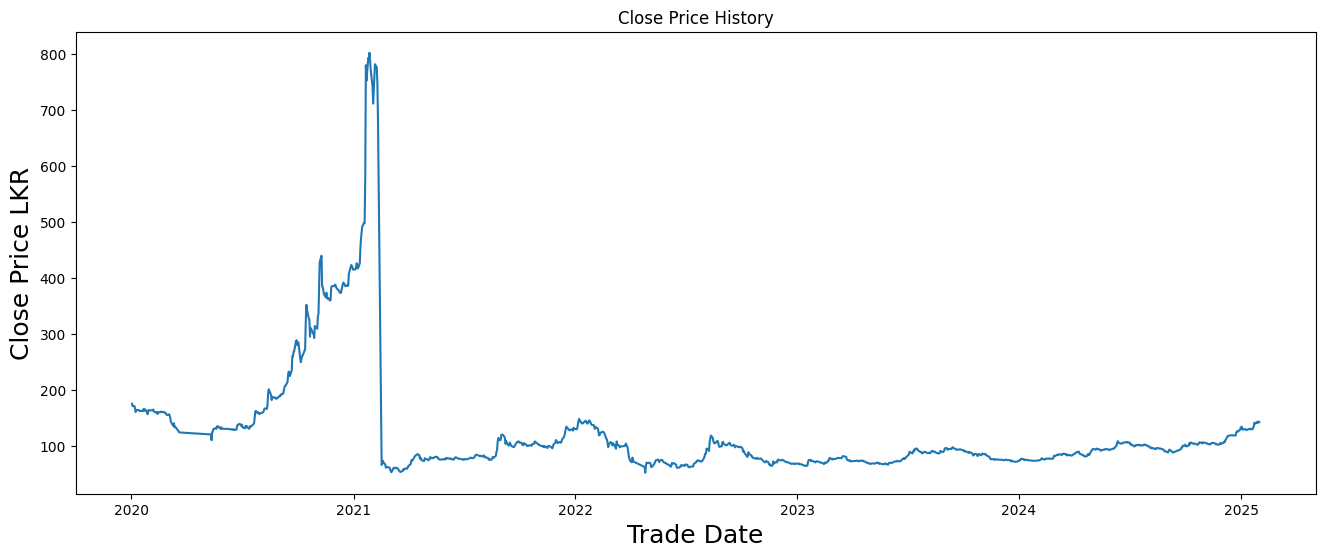

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(hayleys_plc_price_df['Trade Date'],hayleys_plc_price_df['Close (Rs.)'])
plt.xlabel('Trade Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = hayleys_plc_price_df.filter(['Close (Rs.)'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

1120

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.12042896],
       [0.12042896],
       [0.12209419],
       ...,
       [0.15866249],
       [0.15866249],
       [0.16425764]])

In [ ]:
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([0.12042896, 0.12042896, 0.12209419, 0.11809765, 0.12042896,
       0.11676547, 0.11909678, 0.11110371, 0.10710717, 0.10377673,
       0.10311064, 0.10477586, 0.10444282, 0.10177846, 0.1021115 ,
       0.10377673, 0.10344368, 0.10410977, 0.10244455, 0.10977153,
       0.10610804, 0.10177846, 0.09811497, 0.0991141 , 0.0961167 ,
       0.08845667, 0.08912276, 0.08845667, 0.08912276, 0.08878972,
       0.0894558 , 0.08845667, 0.08845667, 0.08712449, 0.08712449,
       0.08479318, 0.07646706, 0.07247053, 0.0738027 , 0.07147139,
       0.0708053 , 0.06814094, 0.0708053 , 0.06947312, 0.06714181,
       0.06647572, 0.0678079 , 0.06714181, 0.06947312, 0.06947312,
       0.07047226, 0.07113835, 0.06980617, 0.06947312, 0.06714181,
       0.06847399, 0.06880703, 0.06980617, 0.06980617, 0.07113835])]
[np.float64(0.07147139146073404)]

[array([0.12042896, 0.12042896, 0.12209419, 0.11809765, 0.12042896,
       0.11676547, 0.11909678, 0.11110371, 0.10710717, 0.10377673,
       0.10311064, 0.10

In [ ]:
!pip install keras

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=32))
model.add(Dense(1))

model.compile(loss="mean_squared_error", optimizer="adam")

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=20)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1060/1060 ━━━━━━━━━━━━━━━━━━━━ 18s 14ms/step - loss: 0.0080
Epoch 2/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - loss: 0.0017
Epoch 3/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0014
Epoch 4/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0022
Epoch 5/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 0.0022
Epoch 6/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - loss: 6.5136e-04
Epoch 7/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.0020
Epoch 8/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - loss: 9.2427e-04
Epoch 9/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 0.0010
Epoch 10/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0019
Epoch 11/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 5.5146e-04
Epoch 12/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - loss: 9.2687e-04
Epoch 13/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - loss: 9.9059e-04
Epoch 14/20
1060/1060 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - loss: 0.0014
Epoc

In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step


np.float64(6.900997472415438)

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print(f"R-squared: {r2}")

R-squared: 0.8044892597728891


/tmp/ipython-input-45-1041969288.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


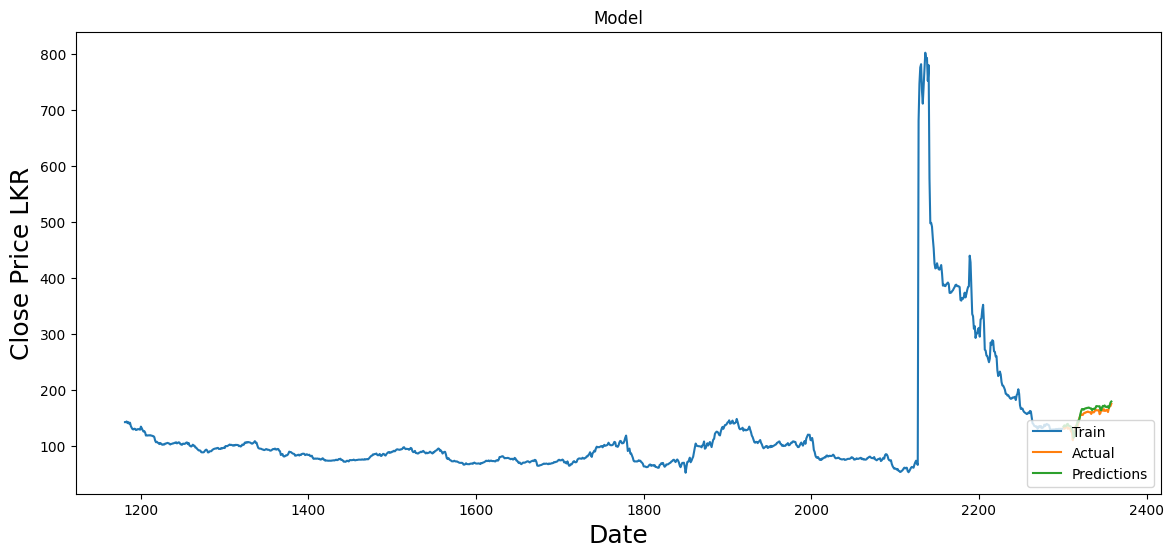

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'Predictions']])
plt.legend(['Train', 'Actual', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
model.save('/content/drive/My Drive/FYP/hayleys_lstm_model.h5')

In [ ]:
future_predictions = []

In [ ]:
_x_test = x_test[:1]

In [ ]:
for i in range(training_data_len, len(dataset)):
    _pred = model.predict(_x_test)
    future_predictions.append(scaler.inverse_transform(_pred))
    _pred = _pred.reshape(1, 1, 1)
    _x_test = np.concatenate((_x_test, _pred), axis=1)
    _x_test = _x_test[:, 1:, :]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━

/tmp/ipython-input-50-571538618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['future_predictions'] = future_predictions[:len(valid)]


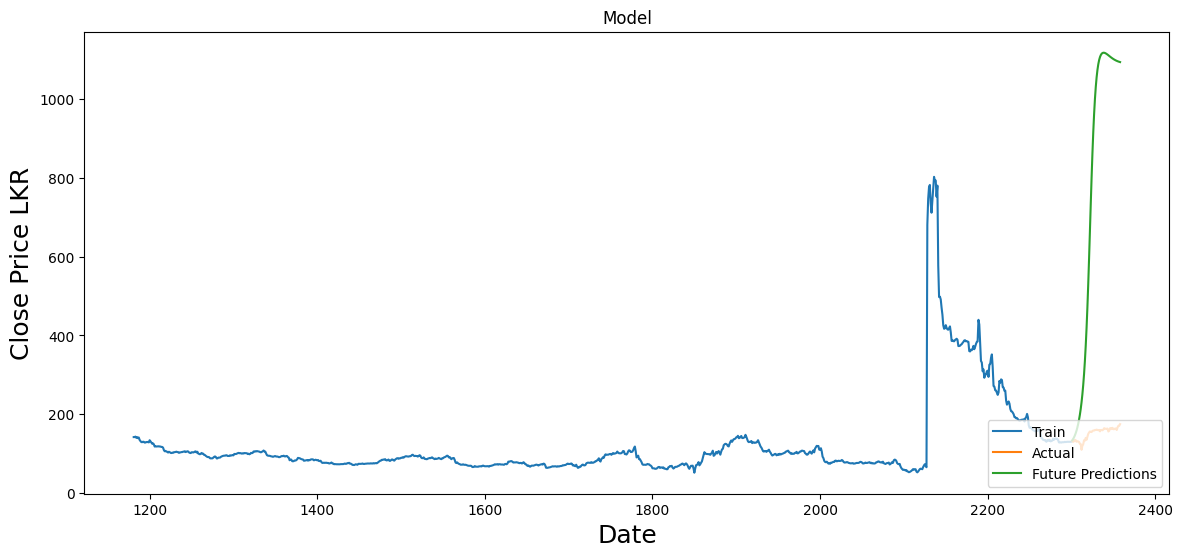

In [ ]:
# Ensure future_predictions matches the length of valid
valid['future_predictions'] = future_predictions[:len(valid)]

# Visualize the data
plt.figure(figsize=(14,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price LKR', fontsize=18)

# Plot the training and actual validation data
plt.plot(train['Close (Rs.)'])
plt.plot(valid[['Close (Rs.)', 'future_predictions']])

# Add legend
plt.legend(['Train', 'Actual', 'Future Predictions'], loc='lower right')
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

actual = valid['Close (Rs.)'].values
predicted = valid['future_predictions'].values

mae = mean_absolute_error(actual, predicted)
rmse = np.sqrt(mean_squared_error(actual, predicted))
r2 = r2_score(actual, predicted)

print(f"24-hour MAE: {mae:.2f}")
print(f"24-hour RMSE: {rmse:.2f}")
print(f"24-hour R² Score: {r2:.4f}")


24-hour MAE: 616.60
24-hour RMSE: 725.36
24-hour R² Score: -2159.0173
